In [68]:
#Logistic Reacrion

In [69]:
#Load the dataset and inspect structure
import pandas as pd

# Load dataset (fixing path issue with raw string)
df = pd.read_csv(r"C:\Users\keert\Downloads\train.csv")

# Inspect structure
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

Shape of dataset: (614, 13)

Columns:
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Data types:
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

First 5 rows:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male  

In [70]:
#Data Cleaning
# Check missing values
print("\nMissing values before cleaning:\n", df.isnull().sum())

# Fill missing values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Drop irrelevant feature
df = df.drop(columns=['Loan_ID'])

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']:
    df[col] = le.fit_transform(df[col])

print("\nMissing values after cleaning:\n", df.isnull().sum())
print("\nData after cleaning:\n", df.head())



Missing values before cleaning:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values after cleaning:
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Data after cleaning:
    Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1         


Summary statistics:
            Gender     Married  Dependents   Education  Self_Employed  \
count  614.000000  614.000000  614.000000  614.000000     614.000000   
mean     0.817590    0.653094    0.744300    0.218241       0.133550   
std      0.386497    0.476373    1.009623    0.413389       0.340446   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    0.000000       0.000000   
50%      1.000000    1.000000    0.000000    0.000000       0.000000   
75%      1.000000    1.000000    1.000000    0.000000       0.000000   
max      1.000000    1.000000    3.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  145.752443        342.410423   
std        6109.041673        2926.248369   84.107233         64.428629   
min         150.000000       

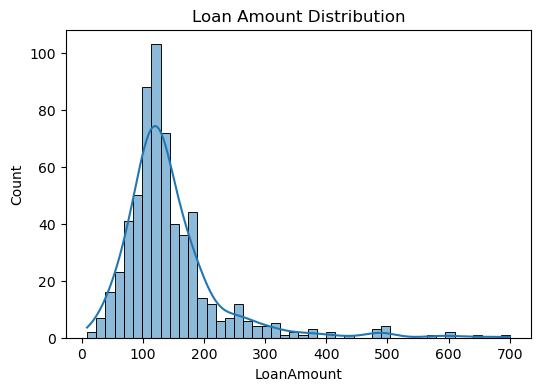

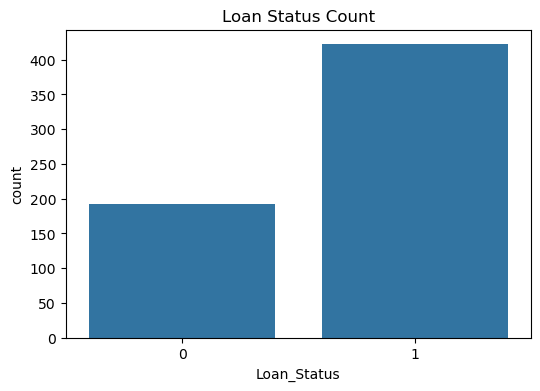

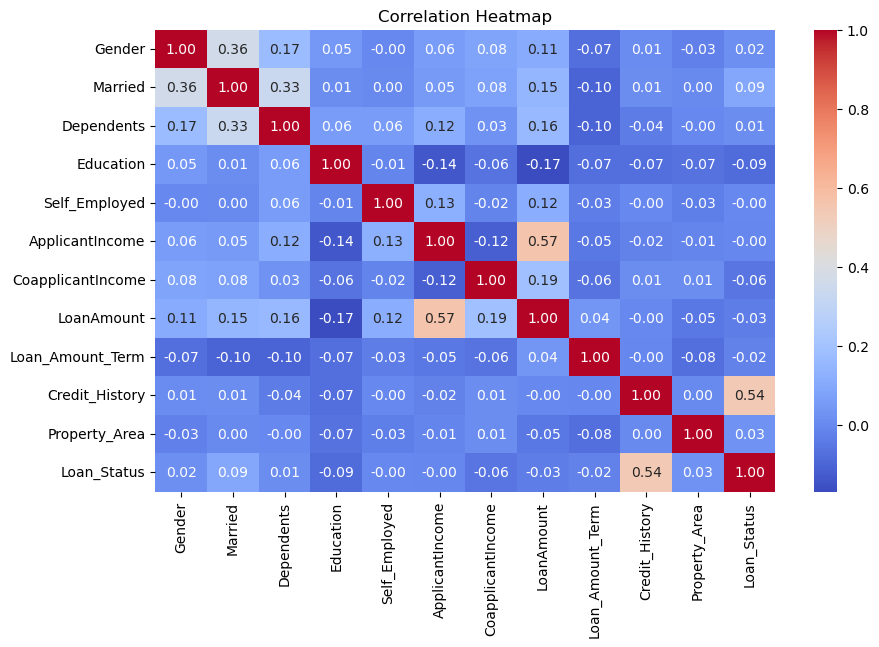

In [71]:
#Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("\nSummary statistics:\n", df.describe())

# Histogram of LoanAmount
plt.figure(figsize=(6,4))
sns.histplot(df['LoanAmount'], kde=True)
plt.title("Loan Amount Distribution")
plt.show()

# Countplot of Loan_Status
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Status Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [72]:
#Define Target and Features
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (614, 11)
Target shape: (614,)


In [73]:
#Define Target and Features
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (429, 11)
Testing set: (185, 11)


In [74]:
#Train-Test Split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train Logistic Regression Model

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [75]:
# predictions (use scaled test data)
y_pred = model.predict(X_test_scaled)
print("Sample predictions:", y_pred[:10])

Sample predictions: [1 1 1 1 1 1 1 1 1 1]


In [76]:
#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8540540540540541
Precision: 0.8333333333333334
Recall: 0.984251968503937
F1 Score: 0.9025270758122743

Confusion Matrix:
 [[ 33  25]
 [  2 125]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.57      0.71        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.89      0.78      0.81       185
weighted avg       0.87      0.85      0.84       185



In [77]:
#Interpret Coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance (Coefficients):\n", coeff_df)



Feature Importance (Coefficients):
               Feature  Coefficient
9      Credit_History     1.183499
1             Married     0.254735
2          Dependents     0.194415
10      Property_Area     0.061036
5     ApplicantIncome     0.025708
8    Loan_Amount_Term     0.016965
0              Gender    -0.048968
7          LoanAmount    -0.062707
4       Self_Employed    -0.071056
6   CoapplicantIncome    -0.111050
3           Education    -0.227457
